<div dir="rtl" align="center">
    <h2><strong> HW1: Overfitting Detection through Validation Set </strong></h2>
</div>

### **Import libraries**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### **Load train and test FasionMNIST dataset**

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
# Load fashionMNIST dataset
trainset = datasets.FashionMNIST(
    root='./data/F_MNIST_data/',
    download=True,
    train=True,
    transform=transform
)

testset = datasets.FashionMNIST(
    root='./data/F_MNIST_data/',
    download=True,
    train=False,
    transform=transform
)

# create data loaders

trainloader = DataLoader(trainset, batch_size=64)

valloader = DataLoader(testset, batch_size=64)



100%|██████████| 26421880/26421880 [00:07<00:00, 3715742.66it/s]


Extracting ./data/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200100.03it/s]


Extracting ./data/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3813563.56it/s]


Extracting ./data/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15947028.80it/s]

Extracting ./data/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/F_MNIST_data/FashionMNIST/raw



### **Construct Multi-Layer Neural Network Model**

In [8]:
# define nn model
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: COMPLETE THIS CODE
        self.flatten = torch.nn.Flatten()
        self.linear_relu_stack =torch. nn.Sequential(
            torch.nn.Linear(28*28, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 10),

        )
    def forward(self, x):
        # TODO: COMPLETE THIS CODE
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits



### **Define Criterion and Optimizer**

In [5]:
model = Net()

# TODO: COMPLETE THIS CODE
# define loss func and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

### **Training & Evaluating NN Model**

In [6]:
EPOCHS = 10
train_losses, val_losses = list(), list()


for epoch in range(EPOCHS):
    #training loop
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
         optimizer.zero_grad()
         outputs = model(images)
         loss = criterion(outputs,labels)
         loss.backward()
         optimizer.step()
         running_loss += loss.item()
    train_losses.append(running_loss/len(trainloader))
    # validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in valloader:
            outputs = model(images)
            loss = criterion(outputs,labels)
            labels_pred = nn.Softmax(dim=1)(outputs).argmax(dim=1)
            val_loss += loss.item()
            _,predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        val_losses.append(val_loss/len(valloader))
        print(f"Epoch: [{epoch + 1}/{EPOCHS}]\t",
              f"Training Loss: {train_losses[-1]:.3f}",
              f"Test Loss: {val_losses[-1]:.3f}",
              f"Test Accuracy: {(correct/total)*100:.3f}")

Epoch: [1/10]	 Training Loss: 0.663 Test Loss: 0.491 Test Accuracy: 82.490
Epoch: [2/10]	 Training Loss: 0.432 Test Loss: 0.440 Test Accuracy: 84.450
Epoch: [3/10]	 Training Loss: 0.388 Test Loss: 0.412 Test Accuracy: 85.270
Epoch: [4/10]	 Training Loss: 0.360 Test Loss: 0.395 Test Accuracy: 85.880
Epoch: [5/10]	 Training Loss: 0.339 Test Loss: 0.382 Test Accuracy: 86.280
Epoch: [6/10]	 Training Loss: 0.323 Test Loss: 0.373 Test Accuracy: 86.680
Epoch: [7/10]	 Training Loss: 0.309 Test Loss: 0.366 Test Accuracy: 87.010
Epoch: [8/10]	 Training Loss: 0.297 Test Loss: 0.360 Test Accuracy: 87.190
Epoch: [9/10]	 Training Loss: 0.286 Test Loss: 0.356 Test Accuracy: 87.350
Epoch: [10/10]	 Training Loss: 0.275 Test Loss: 0.354 Test Accuracy: 87.440


### **Plot train and validation losses**

<function matplotlib.pyplot.show(close=None, block=None)>

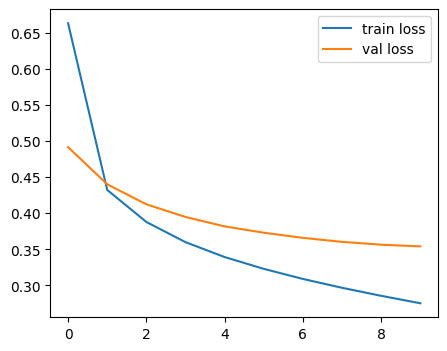

In [7]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(train_losses, label="train loss")
ax.plot(val_losses, label="val loss")
plt.legend()
plt.show